# PAPER 1 : Intruision Detection System

## Step 1 : Bussiness Understanding

**NIDS** or **network intrusion systems** Network Intrusion Detection System (NIDS) monitors network traffic for suspicious or unauthorized activi²ty, alerting administrators to potential security threats.

We are working with a dataset that provides information on actual traffic packets that are being routed through firewalls. To put it another way, the incursions into networks are of importance to this dataset. 
We are provided with 2 datasets named train and test that we will be working on. These datasets's purpose is to find any abnormal behaviour that may lead us to detect attacks on the network or traces of hackers.

## NSL-KDD Dataset

#### Description

The NSL-KDD dataset, an enhanced version of the KDD Cup 99 dataset, serves as a benchmark for Intrusion Detection research. It maintains a balanced mix of normal and attack traces, featuring 41 attributes covering diverse features such as connection duration, byte transfer, and content-related aspects. The dataset includes labels classifying entries into attack types like DoS, Probe, R2L, and U2R.

#### Feature description

>* **Duration:** Length of time duration of the connection
>* **Protocol_type:** Protocol used in the connection
>* **Service:** Destination network service used
>* **Flag:** Status of the connection – Normal or Error
>* **Src_bytes:** Number of data bytes transferred from source to destination in single connection
>* **Dst_bytes:** Number of data bytes transferred from destination to source in single connection
>* **Land:** if source and destination IP addresses and port numbers are equal then, this variable takes value 1 else 0
>* **Wrong_fragment:** Total number of wrong fragments in this connection
>* **Urgent:** Number of urgent packets in this connection. Urgent packets are packets with the urgent bit activated
>* **Hot:** Number of "hot" indicators in the content such as: entering a system directory, creating programs and executing programs
>* **Num_failed _logins:** Count of failed login attempts
>* **Logged_in Login Status:** 1 if successfully logged in; 0 otherwise
>* **Num_compromised:** Number of "compromised" conditions
>* **Root_shell:** 1 if root shell is obtained; 0 otherwise
>* **Su_attempted:** 1 if "su root" command attempted or used; 0 otherwise
>* **Num_root:** Number of "root" accesses or number of operations performed as a root in the connection
>* **Num_file_creations:** Number of file creation operations in the connection
>* **Num_shells:** Number of shell prompts
>* **Num_access_files:** Number of operations on access control files
>* **Num_outbound_cmds:** Number of outbound commands in an ftp session
>* **Is_hot_login:** 1 if the login belongs to the "hot" list i.e., root or admin; else 0
>* **Is_guest_login:** 1 if the login is a "guest" login; 0 otherwise
>* **Count:** Number of connections to the same destination host as the current connection in the past two seconds
>* **Srv_count:** Number of connections to the same service (port number) as the current connection in the past two seconds
>* **Serror_rate:** The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23)
>* **Srv_serror_rate:** The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24)
>* **Rerror_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23)
>* **Srv_rerror_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24)
>* **Same_srv_rate:** The percentage of connections that were to the same service, among the connections aggregated in count (23)
>* **Diff_srv_rate:** The percentage of connections that were to different services, among the connections aggregated in count (23)
>* **diff_host rate:** percentage of connections that were to different destination machines among the connections aggregated in srv_count (24)
>* **Dst_host_count:** Number of connections having the same destination host IP address
>* **Dst_host_srv_count:** Number of connections having the same port number
>* **Dst_host_same_srv_rate:** The percentage of connections that were to the same service, among the connections aggregated in - dst_host_count (32)
>* **Dst_hostdiff srv_rate:** The percentage of connections that were to different services, among the connections aggregated in - dst_host_count (32)
>* **Dst_host_same_src_port_rate:** The percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_c ount (33)
>* **Dst_hostsrv diff_host_rate:** The percentage of connections that were to different destination machines, among the connections aggregated in dst_host_srv_count (33)
>* **Dst_host_serror_rate:** The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32)
>* **Dst_host_srv_s error_rate:** The percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_c ount (33)
>* **Dst_host_rerror_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32)
>* **Dst_host_srv_rerror_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_c ount (33)
>* **Attack:** Type of attack

We have 4 types of attacks that may be important to us:
>* **DoS:** An attack aimed at impeding user access to specific services by overwhelming the system or monopolizing network resources.
>* **U2R:** An attacker attempting to gain root-level access to the service can exfiltrate and view all sensitive data.
>* **R2L:** An attacker, for instance, engages in password guessing to gain unauthorized access by sending remote requests to the server from an external machine.
>* **Probe Attack:** An attempt to gather comprehensive network data and information for subsequent exploitation or unauthorized use.

To understand this data more we will first import all the libraries that we will need eventually for either visualization, data cleaning and all the other steps that we will be going through.
### Load the Libraries

In [46]:
import sys                                          # Read system parameters.
import os                                           # Interact with the operating system.
import numpy as np                                  # Work with multi-dimensional arrays and matrices.
import pandas as pd                                 # Manipulate and analyze data.
import matplotlib                                   # Create 2D charts.
import matplotlib.pyplot as plt                     # Create plots and visualizations.
import seaborn as sns                               # Perform data visualization.
import scipy as sp                                  # Perform scientific computing and advanced mathematics.
import sklearn                                      # Perform data mining and analysis.
from time import time                               # Calculate training time.
from sklearn import metrics                         # Evaluate model performance metrics.
from sklearn.model_selection import GridSearchCV    # Perform hyperparameter tuning using grid search.


In [47]:
import warnings
warnings.filterwarnings('ignore')

## Step 2 : Data Understanding

### Load Train dataset and Test dataset 

In [48]:
file_path_full_training_set = 'NSL-KDD/KDDTrain+.txt'
file_path_full_testing_set = 'NSL-KDD/KDDTest+.txt'
d_raw_train = pd.read_csv(file_path_full_training_set)
d_raw_test = pd.read_csv(file_path_full_testing_set)

In [49]:
print('Train shape',d_raw_train.shape)
print('Test shape',d_raw_test.shape)

Train shape (125972, 43)
Test shape (22543, 43)


In [50]:
d_raw_train.head()

0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...  0.17  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0  ...  0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0  ...  0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0  ...  1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0  ...  1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0  ...  0.07  0.07   

   0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.88    0.00    0.00    0.00   0.0    0.00   normal  15  
1    0.00    0.00    1.00    1.00   0.0    0.00  neptune  19  
2    0.03    0.04    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00    0.00    0.00   1.0    1.00  neptune  21  

[5 rows x 43 columns]

Let's add the labels to our data

In [51]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment'
,'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login'
,'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate'
,'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate'
,'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

d_raw_train.columns = columns
d_raw_test.columns = columns

d_raw_train.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

    attack  level  
0   normal     15  
1  neptune     19  
2   normal     21  
3   normal     21  
4  neptune     21  

[5 rows x 43 columns]

Add a column "attack_state" with 1 if there's an attack and 0 if normal.
And so, we can see how much attack data we have and how much normal data we have.

In [52]:
d_raw_train.describe()

duration     src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_srv_count  \
count  125972.000000    125972.000000  ...       125972.000000   
mean        0.395739         0.279253  ...          115.653725   
std         0.489011        23.942137  ...          110.702886   
min         0.000000         0.000000  ...            0.000000   
25%         0.000000         0.000000  ...           10.000000   
50%         0.000000         0.000000  ...           63.000000   
75%         1.000000         0.000000  ...          255.000000   
max         1.000000      7479.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125972.000000           125972.000000   
mean                 0.521244                0.082952   
std                  0.448950                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125972.000000                125972.000000   
mean                      0.148379                     0.032543   
std                       0.308998                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125972.000000             125972.000000         125972.000000   
mean               0.284455                  0.278487              0.118832   
std                0.444785                  0.445670              0.306559   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate          level  
count             125972.000000  125972.000000  
mean                   0.120241      19.504056  
std                    0.319460       2.291512  
min                    0.000000       0.000000  
25%                    0.000000      18.000000  
50%                   

In [53]:
d_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [54]:
d_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

Let's observe the number of unique values in each of Train and Test datasets

In [55]:
print('The unique value in the Train dataset')
d_raw_train.nunique()

The unique value in the Train dataset


duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [56]:
print('The unique value in the Test dataset')
d_raw_test.nunique()

The unique value in the Test dataset


duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

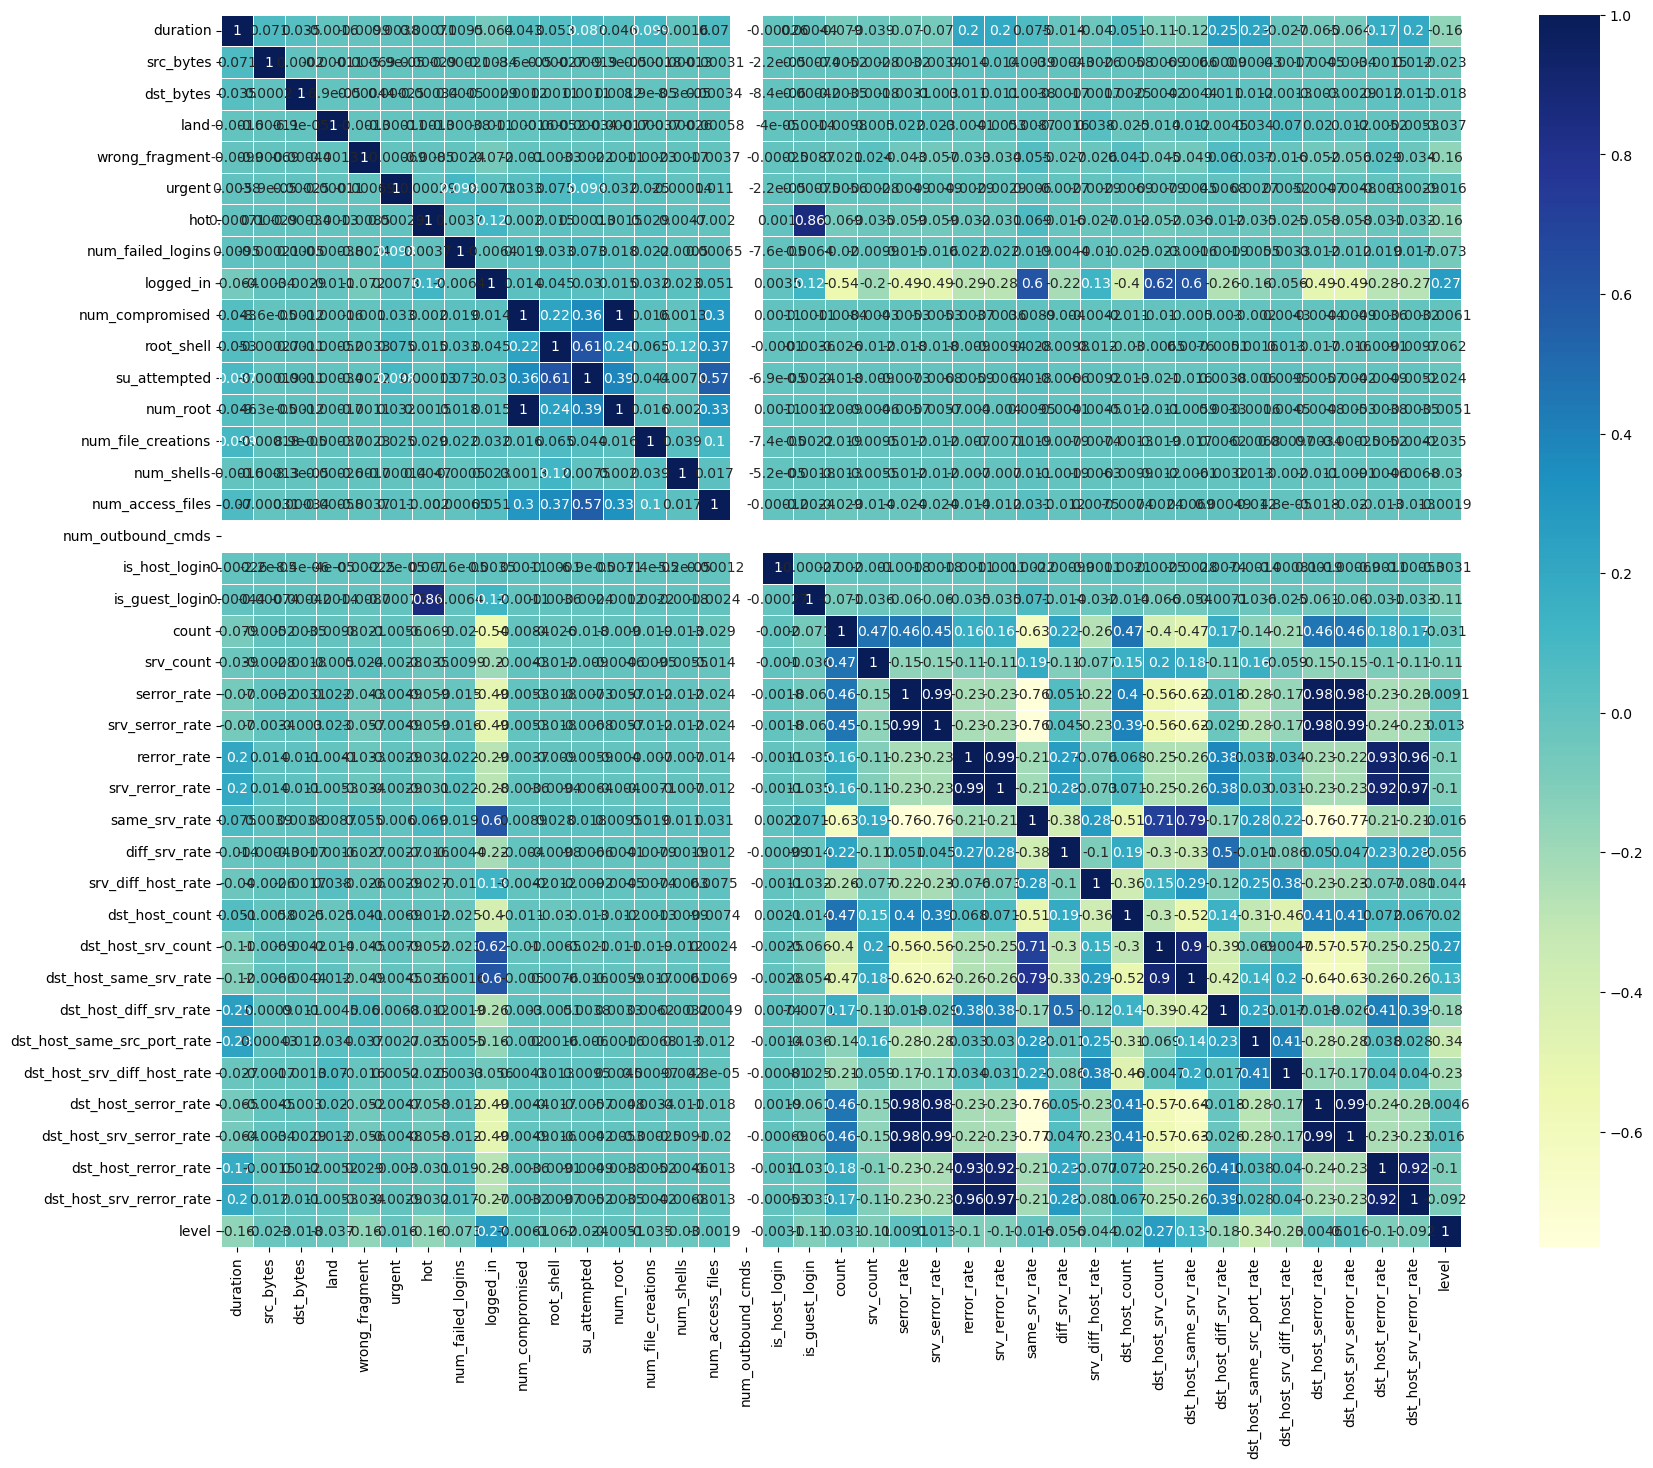

In [57]:
# Train 
# Use the heatmap function from the seaborn package
plt.figure(figsize=(20, 16))
sns.heatmap(d_raw_train.corr(), cmap="YlGnBu", annot=True,linewidths=.5)

# Display the Pharma Sector Heatmap
plt.show()

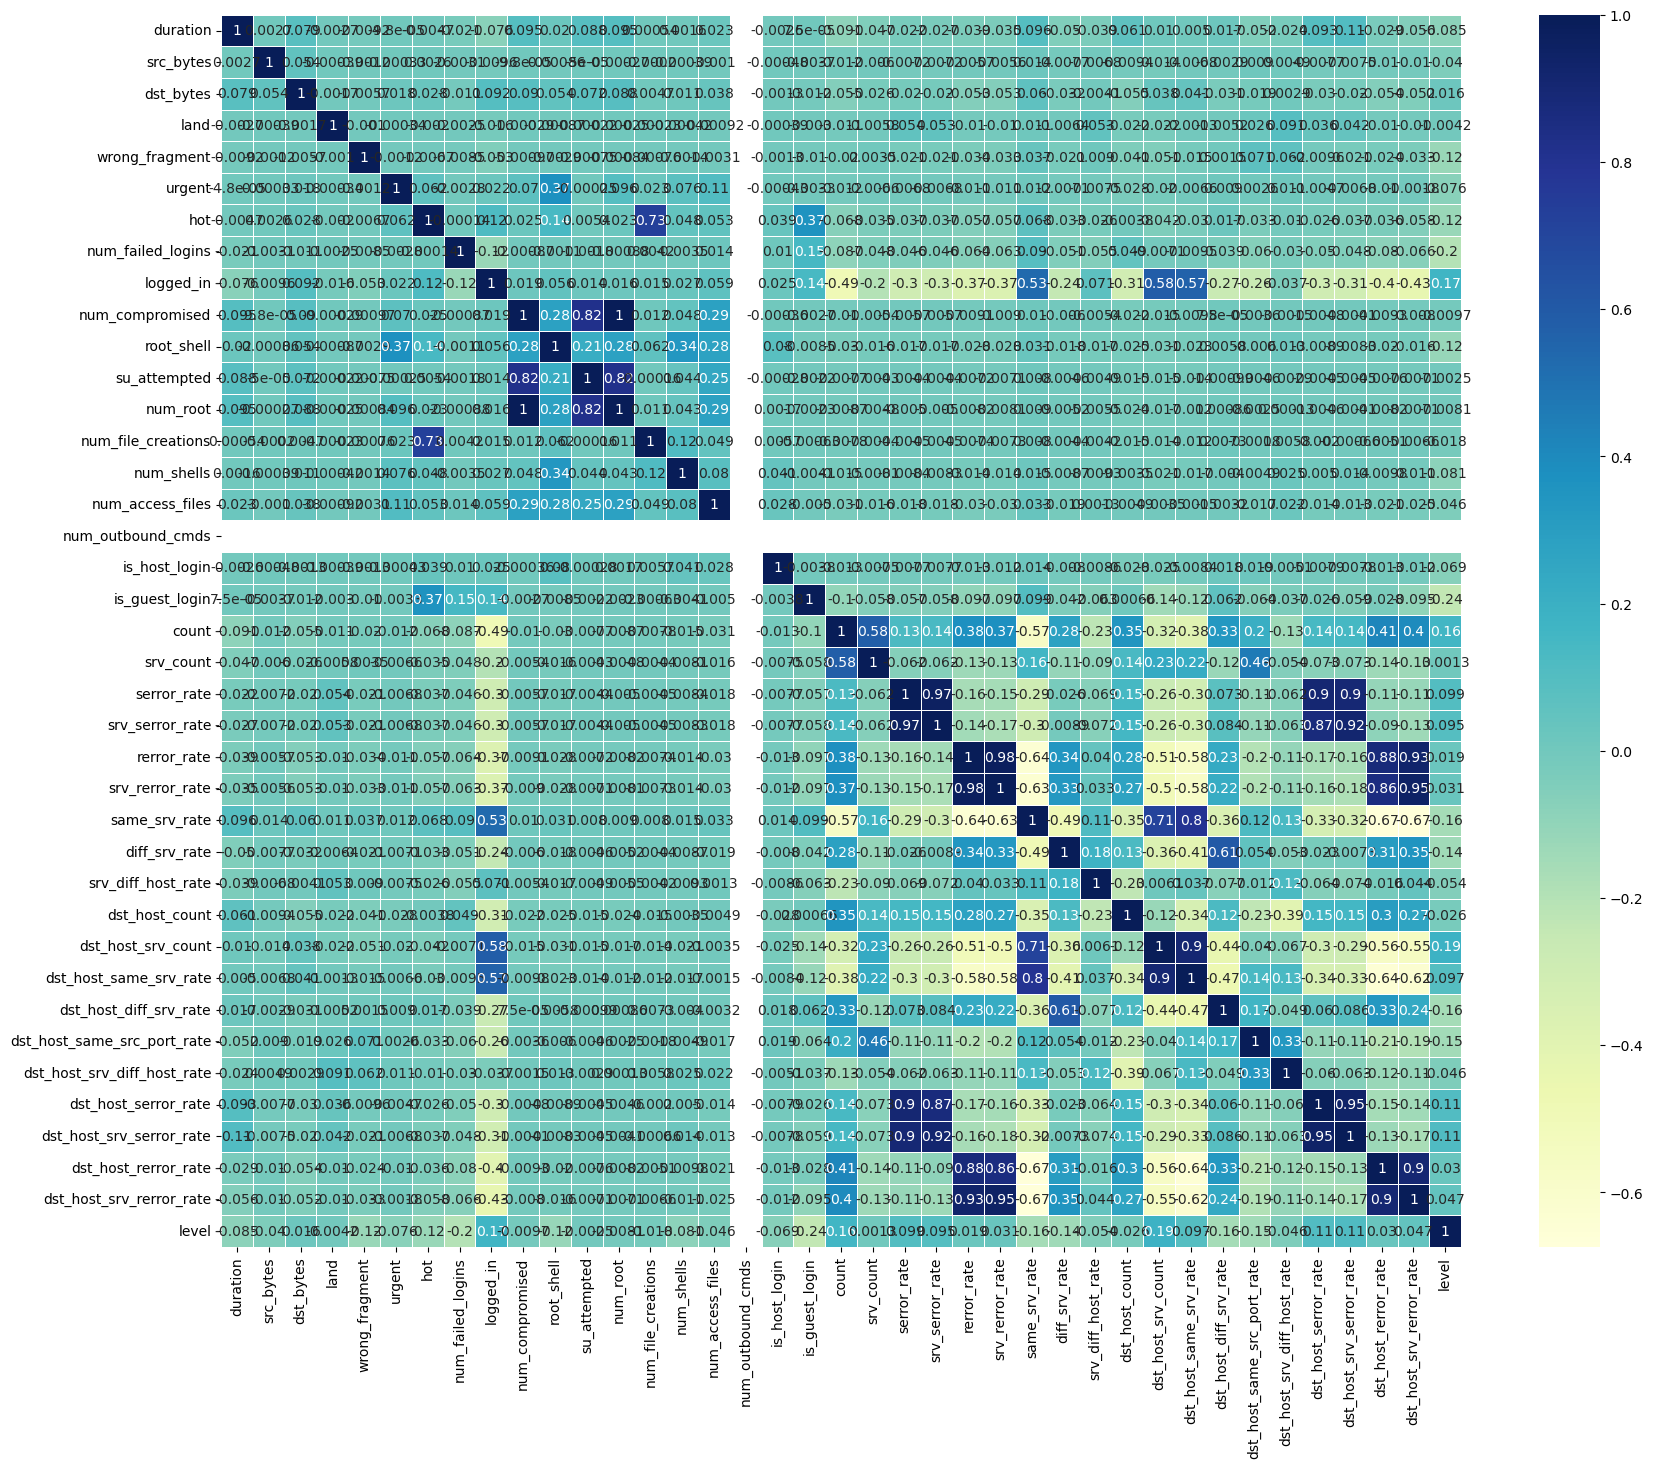

In [58]:
# Test
# Use the heatmap function from the seaborn package
plt.figure(figsize=(20, 16))
sns.heatmap(d_raw_test.corr(), cmap="YlGnBu", annot=True,linewidths=.5)

# Display the Pharma Sector Heatmap
plt.show()

## Step 3 : Data Preparation

We don't have any duplicates in the dataset

In [59]:
d_raw_train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
125967    False
125968    False
125969    False
125970    False
125971    False
Length: 125972, dtype: bool

We have 4 categorical variables in our data type and we don't have any null values.

In [60]:
pd.concat([d_raw_train.isnull().sum(), 100 * d_raw_train.isnull().sum()/len(d_raw_train)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

Missing Records  Percentage (%)
duration                                   0             0.0
protocol_type                              0             0.0
service                                    0             0.0
flag                                       0             0.0
src_bytes                                  0             0.0
dst_bytes                                  0             0.0
land                                       0             0.0
wrong_fragment                             0             0.0
urgent                                     0             0.0
hot                                        0             0.0
num_failed_logins                          0             0.0
logged_in                                  0             0.0
num_compromised                            0             0.0
root_shell                                 0             0.0
su_attempted                               0             0.0
num_root                                   0             0.0
num_file_creations                         0             0.0
num_shells                                 0             0.0
num_access_files                           0             0.0
num_outbound_cmds                          0             0.0
is_host_login                              0             0.0
is_guest_login                             0             0.0
count                                      0             0.0
srv_count                                  0             0.0
serror_rate                                0             0.0
srv_serror_rate                            0             0.0
rerror_rate                                0             0.0
srv_rerror_rate                            0             0.0
same_srv_rate                              0             0.0
diff_srv_rate                              0             0.0
srv_diff_host_rate                         0             0.0
dst_host_count                             0             0.0
dst_host_srv_count                         0             0.0
dst_host_same_srv_rate                     0             0.0
dst_host_diff_srv_rate                     0             0.0
dst_host_same_src_port_rate                0             0.0
dst_host_srv_diff_host_rate                0             0.0
dst_host_serror_rate                       0             0.0
dst_host_srv_serror_rate                   0             0.0
dst_host_rerror_rate                       0             0.0
dst_host_srv_rerror_rate                   0             0.0
attack                                     0             0.0
level                                      0             0.0

We are going to drop the columns 'service' and 'flag'.

In [61]:
drop_cols=['service','flag']
d_raw_train.drop(drop_cols, axis=1, inplace=True)
d_raw_test.drop(drop_cols, axis=1, inplace=True)

In [62]:
d_raw_train.head()

duration protocol_type  src_bytes  dst_bytes  land  wrong_fragment  urgent  \
0         0           udp        146          0     0               0       0   
1         0           tcp          0          0     0               0       0   
2         0           tcp        232       8153     0               0       0   
3         0           tcp        199        420     0               0       0   
4         0           tcp          0          0     0               0       0   

   hot  num_failed_logins  logged_in  ...  dst_host_same_srv_rate  \
0    0                  0          0  ...                    0.00   
1    0                  0          0  ...                    0.10   
2    0                  0          1  ...                    1.00   
3    0                  0          1  ...                    1.00   
4    0                  0          0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

    attack  level  
0   normal     15  
1  neptune     19  
2   normal     21  
3   normal     21  
4  neptune     21  

[5 rows x 41 columns]

# Data Encoding

let's encode the column 'protocol'.

In [63]:
from sklearn.preprocessing import OneHotEncoder
#Train dataset

# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
enc_data = pd.DataFrame(enc.fit_transform(d_raw_train[['protocol_type']]).toarray(),columns=['new_udp', 'new_tcp', 'new_icmp']) 
  
# Merge with main 
d_raw_train = d_raw_train.join(enc_data) 

d_raw_train.head()

duration protocol_type  src_bytes  dst_bytes  land  wrong_fragment  urgent  \
0         0           udp        146          0     0               0       0   
1         0           tcp          0          0     0               0       0   
2         0           tcp        232       8153     0               0       0   
3         0           tcp        199        420     0               0       0   
4         0           tcp          0          0     0               0       0   

   hot  num_failed_logins  logged_in  ...  dst_host_srv_diff_host_rate  \
0    0                  0          0  ...                         0.00   
1    0                  0          0  ...                         0.00   
2    0                  0          1  ...                         0.04   
3    0                  0          1  ...                         0.00   
4    0                  0          0  ...                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                   0.0   
1                  1.00                      1.00                   0.0   
2                  0.03                      0.01                   0.0   
3                  0.00                      0.00                   0.0   
4                  0.00                      0.00                   1.0   

   dst_host_srv_rerror_rate   attack  level  new_udp  new_tcp  new_icmp  
0                      0.00   normal     15      0.0      0.0       1.0  
1                      0.00  neptune     19      0.0      1.0       0.0  
2                      0.01   normal     21      0.0      1.0       0.0  
3                      0.00   normal     21      0.0      1.0       0.0  
4                      1.00  neptune     21      0.0      1.0       0.0  

[5 rows x 44 columns]

In [64]:
#Test dataset

# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
enc_data = pd.DataFrame(enc.fit_transform(d_raw_test[['protocol_type']]).toarray(),columns=['new_udp', 'new_tcp', 'new_icmp']) 
  
# Merge with main 
d_raw_test = d_raw_test.join(enc_data) 

d_raw_test.head()

duration protocol_type  src_bytes  dst_bytes  land  wrong_fragment  urgent  \
0         0           tcp          0          0     0               0       0   
1         2           tcp      12983          0     0               0       0   
2         0          icmp         20          0     0               0       0   
3         1           tcp          0         15     0               0       0   
4         0           tcp        267      14515     0               0       0   

   hot  num_failed_logins  logged_in  ...  dst_host_srv_diff_host_rate  \
0    0                  0          0  ...                         0.00   
1    0                  0          0  ...                         0.02   
2    0                  0          0  ...                         0.28   
3    0                  0          0  ...                         0.02   
4    0                  0          1  ...                         0.03   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                       0.0                  1.00   
1                  0.00                       0.0                  0.00   
2                  0.00                       0.0                  0.00   
3                  0.00                       0.0                  0.83   
4                  0.01                       0.0                  0.00   

   dst_host_srv_rerror_rate   attack  level  new_udp  new_tcp  new_icmp  
0                      1.00  neptune     21      0.0      1.0       0.0  
1                      0.00   normal     21      0.0      1.0       0.0  
2                      0.00    saint     15      1.0      0.0       0.0  
3                      0.71    mscan     11      0.0      1.0       0.0  
4                      0.00   normal     21      0.0      1.0       0.0  

[5 rows x 44 columns]

Now we drop the column.

In [65]:
drop_cols=['protocol_type']
d_raw_train.drop(drop_cols, axis=1, inplace=True)
d_raw_test.drop(drop_cols, axis=1, inplace=True)
d_raw_train.shape

(125972, 43)

We are going to add a new column called 'attack_state' with 1 for existing attack and 0 for none 

In [66]:
is_attack = d_raw_train.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = d_raw_test.attack.map(lambda a: 0 if a == 'normal' else 1)

d_raw_train['attack_state'] = is_attack
d_raw_test['attack_state'] = test_attack

d_raw_train.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        146          0     0               0       0    0   
1         0          0          0     0               0       0    0   
2         0        232       8153     0               0       0    0   
3         0        199        420     0               0       0    0   
4         0          0          0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  dst_host_serror_rate  \
0                  0          0                0  ...                  0.00   
1                  0          0                0  ...                  1.00   
2                  0          1                0  ...                  0.03   
3                  0          1                0  ...                  0.00   
4                  0          0                0  ...                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

    attack  level  new_udp  new_tcp  new_icmp  attack_state  
0   normal     15      0.0      0.0       1.0             0  
1  neptune     19      0.0      1.0       0.0             1  
2   normal     21      0.0      1.0       0.0             0  
3   normal     21      0.0      1.0       0.0             0  
4  neptune     21      0.0      1.0       0.0             1  

[5 rows x 44 columns]

We check for the percentage of attack in the Train and Test datasets.

In [67]:
train_perc = round((d_raw_train.attack_state == 1).sum()/len(d_raw_train) * 100,2)
print('We have about',train_perc,'% attack in our Train dataset')

test_perc = round((d_raw_test.attack_state == 1).sum()/len(d_raw_test) * 100,2)
print('We have about',test_perc,'% attack in our Test dataset')

We have about 46.54 % attack in our Train dataset
We have about 56.92 % attack in our Test dataset


We have 4 types of attacks : Dos, U2R, R2L, Probe. Let's create classes in which those attacks contain the sub-attack types present in the column attacks. 

In [68]:
DoS_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
Probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

attack_labels = ['Normal','DoS','Probe','U2R','R2L']

def class_attack(attack):
    if attack in DoS_attacks:
        attack_type = 1
    elif attack in Probe_attacks:
        attack_type = 2
    elif attack in U2R:
        attack_type = 3
    elif attack in R2L:
        attack_type = 4
    else:
        attack_type = 0       
    return attack_type

#We create the column attack_class and add it to our data
#In this column there are numerical equivalents of the classes of our attacks.

attack_class = d_raw_train.attack.apply(class_attack)
d_raw_train['attack_class'] = attack_class

test_attack_class = d_raw_test.attack.apply(class_attack)
d_raw_test['attack_class'] = test_attack_class

d_raw_train.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        146          0     0               0       0    0   
1         0          0          0     0               0       0    0   
2         0        232       8153     0               0       0    0   
3         0        199        420     0               0       0    0   
4         0          0          0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  \
0                  0          0                0  ...   
1                  0          0                0  ...   
2                  0          1                0  ...   
3                  0          1                0  ...   
4                  0          0                0  ...   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

    attack  level  new_udp  new_tcp  new_icmp  attack_state  attack_class  
0   normal     15      0.0      0.0       1.0             0             0  
1  neptune     19      0.0      1.0       0.0             1             1  
2   normal     21      0.0      1.0       0.0             0             0  
3   normal     21      0.0      1.0       0.0             0             0  
4  neptune     21      0.0      1.0       0.0             1             1  

[5 rows x 45 columns]

Let's get to know our new dataset

In [69]:
#Display the Percentage of each type of attack in our Train dataset
print('The percentage of the attacks types in the Train dataset : ')
Normal = round((d_raw_train.attack_class == 0).sum()/len(d_raw_train)*100,2)
print('Normal = ' , Normal)
DoSDDoS = round((d_raw_train.attack_class == 1).sum()/len(d_raw_train)*100,2)
print('DoS/DDoS = ' , DoSDDoS)
Probe = round((d_raw_train.attack_class == 2).sum()/len(d_raw_train)*100,2)
print("Probe = " , Probe )
U2R = round((d_raw_train.attack_class == 3).sum()/len(d_raw_train)*100,2)
print('U2R = ', U2R)
R2L = round((d_raw_train.attack_class == 4).sum()/len(d_raw_train)*100,2)
print('R2L = ' ,R2L)

The percentage of the attacks types in the Train dataset : 
Normal =  53.47
DoS/DDoS =  36.46
Probe =  9.25
U2R =  0.03
R2L =  0.79


125972
45927
52
995
78998


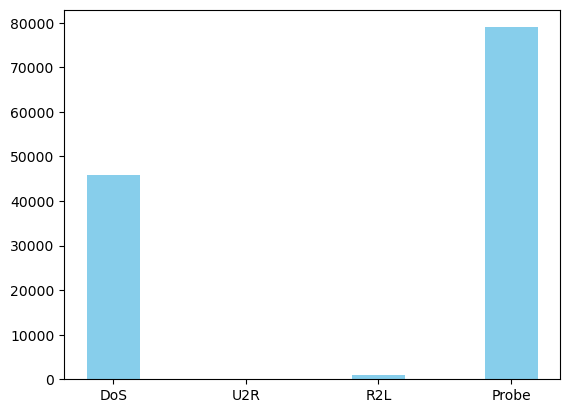

In [72]:
#Number of instances of each type of attack in train dataset
print(len(d_raw_train))
DoS=0
U2R=0
R2L=0
Probe=0

for i in range(len(d_raw_train)):
    if (d_raw_train['attack'][i] in (['neptune','back','land','pod','smurf','teardrop','mailbomb','apache2','processtable','udpstorm','worm'])):
        DoS+=1
    elif (d_raw_train['attack'][i] in ['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm']):
        U2R+=1
    elif d_raw_train['attack'][i] in ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster', 'sendmail', 'named', 'snmpgetattack',
'snmpguess', 'xlock', 'xsnoop', 'httptunnel']:
        R2L+=1
    else:
        Probe+=1
print(DoS)
print(U2R)
print(R2L)
print(Probe)
data = [['DoS', DoS], ['U2R', U2R], ['R2L', R2L], ['Probe', Probe]]
df = pd.DataFrame(data, columns=['Type', 'Number'])
lval=[DoS,U2R,R2L,Probe]
listx=["DoS","U2R","R2L","Probe"]

#plt.hist(df, bins=30, color='skyblue', edgecolor='black')
plt.bar(listx, lval, color ='skyblue',  width = 0.4)
#plt.hist(d_raw_train['attack'], bins=30, color='skyblue', edgecolor='black')
plt.show()

In [73]:
#Display the Percentage of each type of attack ine our Test dataset
print('The percentage of the attacks types in the Test dataset : ')
Normal = round((d_raw_test.attack_class == 0).sum()/len(d_raw_test)*100,2)
print('Normal = ' , Normal)
DoSDDoS = round((d_raw_test.attack_class == 1).sum()/len(d_raw_test)*100,2)
print('DoS/DDoS = ' , DoSDDoS)
Probe = round((d_raw_test.attack_class == 2).sum()/len(d_raw_test)*100,2)
print("Probe = " , Probe )
U2R = round((d_raw_test.attack_class == 3).sum()/len(d_raw_test)*100,2)
print('U2R = ', U2R)
R2L = round((d_raw_test.attack_class == 4).sum()/len(d_raw_test)*100,2)
print('R2L = ' ,R2L)

The percentage of the attacks types in the Test dataset : 
Normal =  43.72
DoS/DDoS =  33.09
Probe =  10.74
U2R =  0.29
R2L =  12.17


22543
7459
67
2885
12132


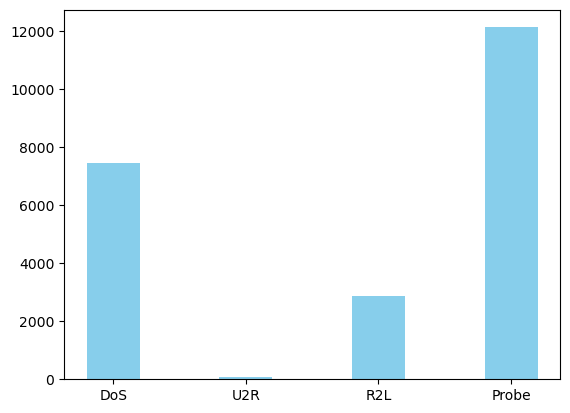

In [74]:
print(len(d_raw_test))
DoS=0
U2R=0
R2L=0
Probe=0

for i in range(len(d_raw_test)):
    if (d_raw_test['attack'][i] in (['neptune','back','land','pod','smurf','teardrop','mailbomb','apache2','processtable','udpstorm','worm'])):
        DoS+=1
    elif (d_raw_test['attack'][i] in ['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm']):
        U2R+=1
    elif d_raw_test['attack'][i] in ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster', 'sendmail', 'named', 'snmpgetattack',
'snmpguess', 'xlock', 'xsnoop', 'httptunnel']:
        R2L+=1
    else:
        Probe+=1
print(DoS)
print(U2R)
print(R2L)
print(Probe)
lval=[DoS,U2R,R2L,Probe]
listx=["DoS","U2R","R2L","Probe"]

#plt.hist(df, bins=30, color='skyblue', edgecolor='black')
plt.bar(listx, lval, color ='skyblue',  width = 0.4)
#plt.hist(d_raw_train['attack'], bins=30, color='skyblue', edgecolor='black')
plt.show()

Let's view the distributions of our general attack classes in the Train dataset.

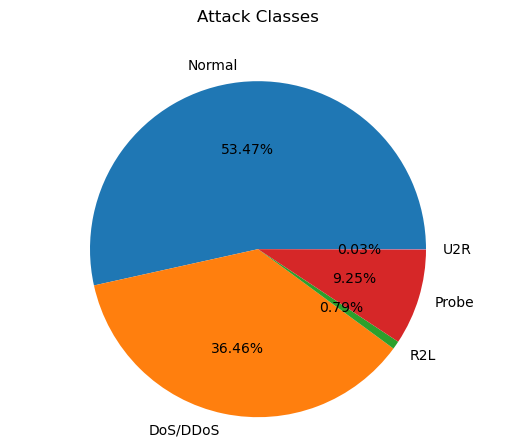

In [75]:
Normal = (d_raw_train.attack_class == 0).sum()
DoSDDoS = (d_raw_train.attack_class == 1).sum()
R2L = (d_raw_train.attack_class == 4).sum()
Probe = (d_raw_train.attack_class == 2).sum()
U2R = (d_raw_train.attack_class == 3).sum()

myData = [Normal , DoSDDoS,R2L,Probe,U2R]

pie_labels = 'Normal','DoS/DDoS' ,'R2L' ,'Probe' ,'U2R'
plt.pie(myData,labels=pie_labels ,autopct='%1.2f%%' , shadow = False)
plt.title('Attack Classes\n\n')
plt.axis('equal')
plt.show()

Now we can delete the columns where we have categorical variables.

In [76]:
drop_cols = ['attack' ]  
d_raw_train.drop(drop_cols, axis=1, inplace=True)   
d_raw_test.drop(drop_cols, axis=1, inplace=True)

Our dataset is have now only numerical values.

In [77]:
print(d_raw_train.dtypes)

duration                         int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

In [78]:
d_raw_train.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        146          0     0               0       0    0   
1         0          0          0     0               0       0    0   
2         0        232       8153     0               0       0    0   
3         0        199        420     0               0       0    0   
4         0          0          0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  dst_host_serror_rate  \
0                  0          0                0  ...                  0.00   
1                  0          0                0  ...                  1.00   
2                  0          1                0  ...                  0.03   
3                  0          1                0  ...                  0.00   
4                  0          0                0  ...                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

   level  new_udp  new_tcp  new_icmp  attack_state  attack_class  
0     15      0.0      0.0       1.0             0             0  
1     19      0.0      1.0       0.0             1             1  
2     21      0.0      1.0       0.0             0             0  
3     21      0.0      1.0       0.0             0             0  
4     21      0.0      1.0       0.0             1             1  

[5 rows x 44 columns]

In [79]:
d_raw_train.shape

(125972, 44)

## Feature Selection

We used the Correlation Analysis for our feature selection. the resulting outcome is 21 features

In [80]:
# Compute the correlation matrix
correlation_matrix = d_raw_train.corr()

# Identify highly correlated features par rapport  à attack_class
correlation_matrix_y = correlation_matrix['attack_class']
high_corr_features = correlation_matrix_y[correlation_matrix_y > 0.05].index.tolist()

# Drop highly correlated features
d_raw_train = d_raw_train[high_corr_features]

In [81]:
column_names = d_raw_train.columns
print(column_names)

Index(['duration', 'wrong_fragment', 'hot', 'is_guest_login', 'count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'new_udp',
       'attack_state', 'attack_class'],
      dtype='object')


In [82]:
d_raw_train.head()

duration  wrong_fragment  hot  is_guest_login  count  serror_rate  \
0         0               0    0               0     13          0.0   
1         0               0    0               0    123          1.0   
2         0               0    0               0      5          0.2   
3         0               0    0               0     30          0.0   
4         0               0    0               0    121          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  diff_srv_rate  ...  \
0              0.0          0.0              0.0           0.15  ...   
1              1.0          0.0              0.0           0.07  ...   
2              0.2          0.0              0.0           0.00  ...   
3              0.0          0.0              0.0           0.00  ...   
4              0.0          1.0              1.0           0.06  ...   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

   new_udp  attack_state  attack_class  
0      0.0             0             0  
1      0.0             1             1  
2      0.0             0             0  
3      0.0             0             0  
4      0.0             1             1  

[5 rows x 21 columns]

In [83]:
selected_columns = d_raw_train.columns.tolist()

d_raw_test = d_raw_test[d_raw_train.columns.intersection(selected_columns)]

In [84]:
d_raw_test.head()

duration  wrong_fragment  hot  is_guest_login  count  serror_rate  \
0         0               0    0               0    136          0.0   
1         2               0    0               0      1          0.0   
2         0               0    0               0      1          0.0   
3         1               0    0               0      1          0.0   
4         0               0    0               0      4          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  diff_srv_rate  ...  \
0             0.00          1.0              1.0           0.06  ...   
1             0.00          0.0              0.0           0.00  ...   
2             0.00          0.0              0.0           0.00  ...   
3             0.12          1.0              0.5           0.00  ...   
4             0.00          0.0              0.0           0.00  ...   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.04                         0.61   
2                    0.00                         1.00   
3                    0.17                         0.03   
4                    0.00                         0.01   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.02                  0.00   
2                         0.28                  0.00   
3                         0.02                  0.00   
4                         0.03                  0.01   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  0.00                      0.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.83                      0.71   
4                       0.0                  0.00                      0.00   

   new_udp  attack_state  attack_class  
0      0.0             1             1  
1      0.0             0             0  
2      1.0             1             2  
3      0.0             1             2  
4      0.0             0             0  

[5 rows x 21 columns]

Split the data into X_train,y_train and X_test,y_test

In [85]:
X_train = d_raw_train.drop('attack_class'  , axis = 1)
X_test = d_raw_test.drop('attack_class' , axis = 1)
y_train = d_raw_train['attack_class']
y_test = d_raw_test['attack_class']

## Data Normalization

In [86]:
from sklearn.preprocessing import MinMaxScaler
num_col = X_train.columns
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=num_col)
X_test = pd.DataFrame(X_test_scaled, columns=num_col)
X_train.head()

duration  wrong_fragment  hot  is_guest_login     count  serror_rate  \
0       0.0             0.0  0.0             0.0  0.025440          0.0   
1       0.0             0.0  0.0             0.0  0.240705          1.0   
2       0.0             0.0  0.0             0.0  0.009785          0.2   
3       0.0             0.0  0.0             0.0  0.058708          0.0   
4       0.0             0.0  0.0             0.0  0.236791          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  diff_srv_rate  \
0              0.0          0.0              0.0           0.15   
1              1.0          0.0              0.0           0.07   
2              0.2          0.0              0.0           0.00   
3              0.0          0.0              0.0           0.00   
4              0.0          1.0              1.0           0.06   

   dst_host_count  dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0        1.000000                    0.60                         0.88   
1        1.000000                    0.05                         0.00   
2        0.117647                    0.00                         0.03   
3        1.000000                    0.00                         0.00   
4        1.000000                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

   new_udp  attack_state  
0      0.0           0.0  
1      0.0           1.0  
2      0.0           0.0  
3      0.0           0.0  
4      0.0           1.0

## Step 4 : Modeling & Step 5 : Evaluation

This is a function to calculate the accuracy of the training and testing data given a model.

In [87]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

### Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test,  tree))

{'test Accuracy': 0.8621301512664685, 'train Accuracy': 0.9998253580160671}


Let's evaluate the model. \
0,1,2,3,4 refers respectively to our attack classes : normal,Dos, U2R, R2L, Probe.

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.92      0.87      0.90      7459
           2       0.57      0.91      0.70      2421
           3       0.03      0.31      0.05        65
           4       0.85      0.36      0.50      2743

    accuracy                           0.86     22543
   macro avg       0.67      0.69      0.63     22543
weighted avg       0.90      0.86      0.87     22543



Let's create a view of the decision tree 

In [90]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

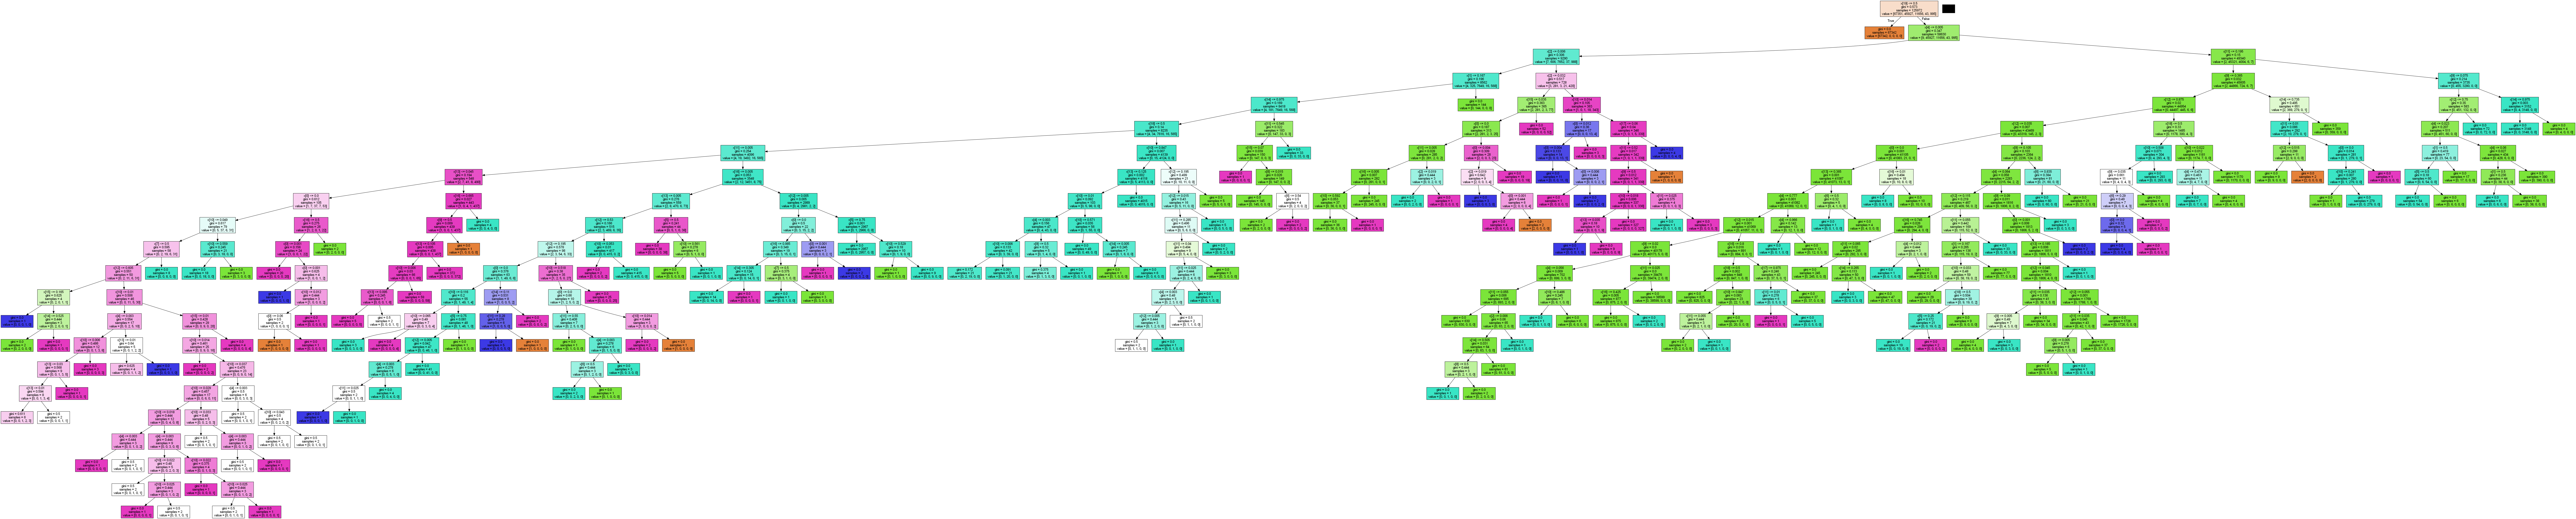

In [91]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'NSLKDD.png'
graph.write_png(filename)
Image(filename=filename)

### kNN

In [92]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)
knn = knn.fit(X_train , y_train)
knn_pred = knn.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test, knn))

{'test Accuracy': 0.8579159827884487, 'train Accuracy': 0.9990553456323628}


In [94]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9855
           1       0.85      0.90      0.87      7459
           2       0.58      0.85      0.69      2421
           3       0.02      0.11      0.03        65
           4       0.92      0.33      0.48      2743

    accuracy                           0.86     22543
   macro avg       0.67      0.63      0.61     22543
weighted avg       0.89      0.86      0.85     22543



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

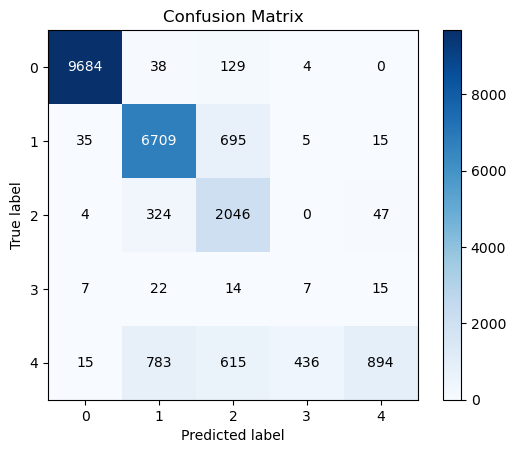

In [95]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as splt

splt.plot_confusion_matrix(y_test, knn_pred)

### SVM

In [96]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm = svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test, svm))

{'test Accuracy': 0.8742403406822516, 'train Accuracy': 0.9964198393293748}


In [97]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.76      0.97      0.86      7459
           2       0.76      0.78      0.77      2421
           3       0.00      0.00      0.00        65
           4       0.99      0.31      0.47      2743

    accuracy                           0.87     22543
   macro avg       0.70      0.61      0.62     22543
weighted avg       0.89      0.87      0.86     22543



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

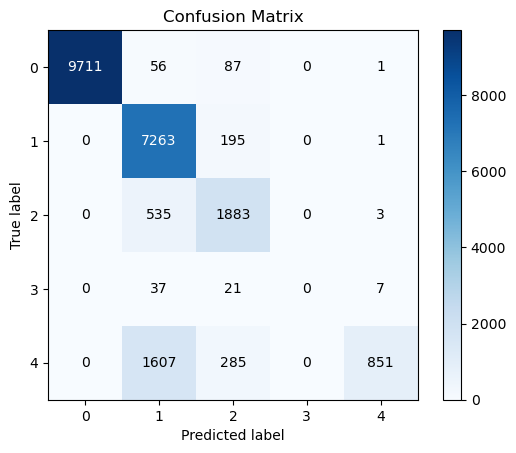

In [98]:
splt.plot_confusion_matrix(y_test, svm_pred)

### LOGISTIC REGRESSION

In [99]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)
logreg_model = logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test, logreg_model))

{'test Accuracy': 0.8788537461739786, 'train Accuracy': 0.9956260121296796}


In [100]:
print(classification_report(y_test, logreg_pred)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.77      0.97      0.86      7459
           2       0.78      0.83      0.81      2421
           3       1.00      0.00      0.00        65
           4       0.99      0.31      0.47      2743

    accuracy                           0.88     22543
   macro avg       0.91      0.62      0.63     22543
weighted avg       0.90      0.88      0.86     22543



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

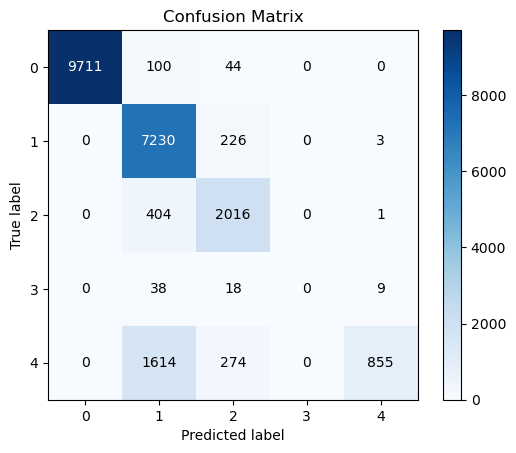

In [101]:
splt.plot_confusion_matrix(y_test, logreg_pred)

### Bagging : Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 6, min_samples_leaf = 10,
                                min_samples_split = 78,bootstrap = True,oob_score = True,random_state = 1912)

forest.fit(X_train, np.ravel(y_train))

forest_pred = forest.predict(X_test)

print(get_accuracy(X_train, X_test, y_train, y_test, forest))

{'test Accuracy': 0.8639045379940558, 'train Accuracy': 0.9943717651541613}


In [103]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9855
           1       0.80      0.94      0.86      7459
           2       0.68      0.91      0.78      2421
           3       0.00      0.00      0.00        65
           4       0.99      0.19      0.32      2743

    accuracy                           0.86     22543
   macro avg       0.69      0.61      0.59     22543
weighted avg       0.88      0.86      0.84     22543



### Boosting : AdaBoost

we are going to use GridSearchCV to search over specified parameter values of the model.

In [104]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [105]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
             'n_estimators' : [2*n+1 for n in range(10)],
              'algorithm':['SAMME', 'SAMME.R']}                

param_grid 

{'learning_rate': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'algorithm': ['SAMME', 'SAMME.R']}

In [106]:
search = GridSearchCV(estimator=ada, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [107]:
best_ada = search.best_estimator_
best_ada.fit(X_train, y_train)

# Make predictions on the test set
ada_pred = best_ada.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test, best_ada))

{'test Accuracy': 0.8395510801579205, 'train Accuracy': 0.9879100117486426}


In [108]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.92      0.81      0.86      7459
           2       0.42      0.89      0.57      2421
           3       0.00      0.00      0.00        65
           4       0.90      0.38      0.53      2743

    accuracy                           0.84     22543
   macro avg       0.65      0.61      0.59     22543
weighted avg       0.90      0.84      0.84     22543



Final Evaluation.

In [146]:
from sklearn.model_selection import cross_val_score

# define the list of models that we want to test
models = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors = 6),
    SVC(kernel='linear'),
    RandomForestClassifier(),
    LogisticRegression(),
    AdaBoostClassifier(),
]

# an empty list to capture the performance of each model
model_comps = []

# walk through the models and populate our list
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_test, y_test, scoring='accuracy')
    for count, accuracy in enumerate(accuracies):
        model_comps.append((model_name, count, accuracy))

<Axes: >

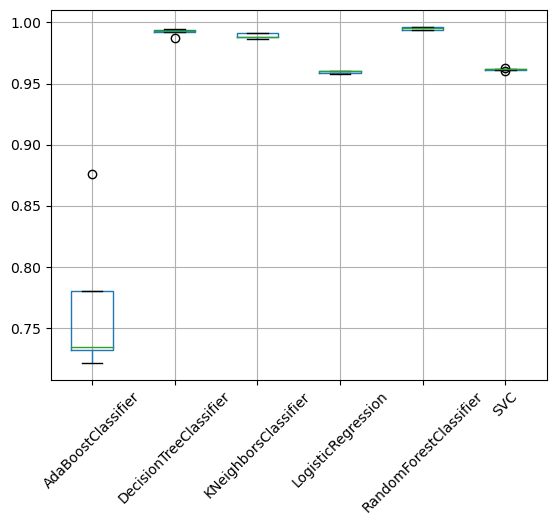

In [147]:
# a box plot will do well to show us overall performance and the variation in the models.
result_df = pd.DataFrame(model_comps, columns=['model_name', 'count', 'accuracy'])
result_df.pivot(index='count',columns='model_name',values='accuracy').boxplot(rot=45)

## Conclusion :

We performed data pre-processing on the **NSL-KDD dataset** by handling missing values, applying one hot encoding and 
normalizing data. \
We have successfully selected the best features for each type of attack. We have acquired the performance of all algorithms on classification and ensemble learning of 4 attacks: DoS, U2R, R2L and Probe. \
We have found that the **RandomForest algorithm** gives a better result with a test accuracy of **86.39%**, followed by **Decision tree algorithm** with a test accuracy of **86.23%**.\
Therefore, the results show that RandomForest algorithm gives an overall better result as compared to all the other algorithm which are,by descending, :
- Decision Tree 
- KNN 
- SVM 
- Logistic Regression
- AdaBoost.

## Step 6 : Deployment

We're going to use the DecisionTreeClassifier() as the classifier for our model deployment.

In [ ]:
from sklearn.preprocessing import StandardScaler ,OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Selecting categorical and numeric features
numerical_ix = X_train.select_dtypes(include=np.number).columns
categorical_ix = X_train.select_dtypes(exclude=np.number).columns
# Create preprocessing pipelines for each datatype
numerical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
('encoder', OrdinalEncoder()),
('scaler', StandardScaler())])
# Putting the preprocessing steps together
preprocessor = ColumnTransformer([
('numerical', numerical_transformer, numerical_ix),
('categorical', categorical_transformer, categorical_ix)],
remainder='passthrough')

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score

pipe = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('selector', SelectKBest(k='all')),
  ('classifier', DecisionTreeClassifier())])
score = cross_val_score(pipe, X_train, y_train, cv=10, scoring='roc_auc').mean()

In [130]:
# Creating the grid
grid = {
   "classifier__max_depth": [1, 3, 5],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__min_samples_split": [2, 5, 10]}
# Instantiating the gridsearch and fitting the data
gridsearch = GridSearchCV(estimator=pipe, param_grid=grid, n_jobs= 1, scoring='roc_auc')
# GridSearchCV uses 5-fold CV by default
gridsearch.fit(X_train,y_train)
# Getting the results
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'classifier__criterion': 'gini', 'classifier__max_depth': 1, 'classifier__min_samples_split': 2}
nan


In [141]:
from sklearn.metrics import accuracy_score

## Creating the predictions
y_pred = gridsearch.predict(X_test)

# For binary classification
if len(gridsearch.classes_) == 2:
    y_score = gridsearch.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_score)
else:
    # For multi-class classification, use 'ovr' for multi-class ROC-AUC
    y_score = gridsearch.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')

# Looking at the performance
print('AUCROC:', roc_auc, '\nAccuracy:', accuracy_score(y_test, y_pred))

AUCROC: 0.803426594740851 
Accuracy: 0.7616555028168389


In [136]:
prediction_test = gridsearch.predict(X_test)
print(y_test,prediction_test)

0        1
1        0
2        2
3        2
4        0
        ..
22538    0
22539    0
22540    1
22541    0
22542    2
Name: attack_class, Length: 22543, dtype: int64 [1 0 1 ... 1 0 1]


In [143]:
import pickle
pickle.dump(gridsearch,open('Supervised_NSL_KDD.pkl','wb'))